Data dimensions: (330616,) (330616,)
X limits: -15.39276 15.39276
Y limits: -10.884325 10.884325


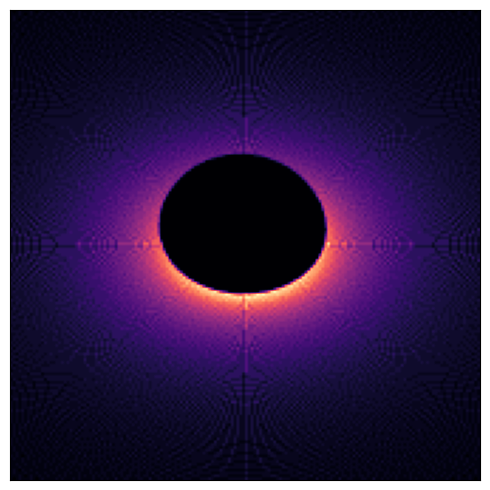

In [60]:
import numpy as np
import mpl_scatter_density
import matplotlib.pyplot as plt

from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(vmin=0., vmax=6000, stretch=LogStretch())

# Read data
spin = 0.50
inc = 45
filename = generate_filename(spin, inc)
data = np.loadtxt(filename)
x = data[:, 0]
y = data[:, 1]

# Print data dimensions
print('Data dimensions:', x.shape, y.shape)

# Compute 95% max and 5% min
percent = 75
xmax = np.percentile(x, percent)
xmin = np.percentile(x, 100 - percent)
ymax = np.percentile(y, percent)
ymin = np.percentile(y, 100 - percent)

print('X limits:', xmin, xmax)
print('Y limits:', ymin, ymax)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
ax.scatter_density(x, y, cmap='magma', dpi=36)

# Adaptive x and y limits
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Use tight layout
plt.tight_layout()

# Rotate by 90 degrees
# plt.gca().invert_xaxis()

plt.savefig(r'bh_{}_{}.png'.format(spin, inc), dpi=300)


In [50]:
def plot_data(filename, percent=90):
    # Read data
    data = np.loadtxt(filename)
    x = data[:, 0]
    y = data[:, 1]

    # Compute 95% max and 5% min
    xmax = np.percentile(x, percent)
    xmin = np.percentile(x, 100 - percent)
    ymax = np.percentile(y, percent)
    ymin = np.percentile(y, 100 - percent)

    print('X limits:', xmin, xmax)
    print('Y limits:', ymin, ymax)

    fig = plt.figure(figsize=(5, 5))
    # ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    plt.scatter_density(x, y, cmap='magma')

    # Adaptive x and y limits
    fig.set_xlim(-12, 12)
    fig.set_ylim(-12, 12)

    # Remove ticks
    fig.set_xticks([])
    fig.set_yticks([])

    # Use tight layout
    plt.tight_layout()

    # plt.show()
    return fig, ax

In [51]:
plot_data(r'C:\Users\WalkerXin\Documents\Scripts\raytransfer\ironline\observed_a0.950.def0.00.i20.00.dat')

X limits: -40.6985896 40.69858960000006
Y limits: -38.24416359999999 38.24416360000006


AttributeError: Figure.set() got an unexpected keyword argument 'projection'

In [28]:
def generate_filename(a, inc):
    return f'observed_a{a:.3f}.def0.00.i{inc:.2f}.dat'

filenames = [generate_filename(0.50, 20), generate_filename(0.50, 45),
                generate_filename(0.75, 20), generate_filename(0.75, 45),
                generate_filename(0.95, 20), generate_filename(0.95, 45)]

AttributeError: 'Axes' object has no attribute 'add_subplot'

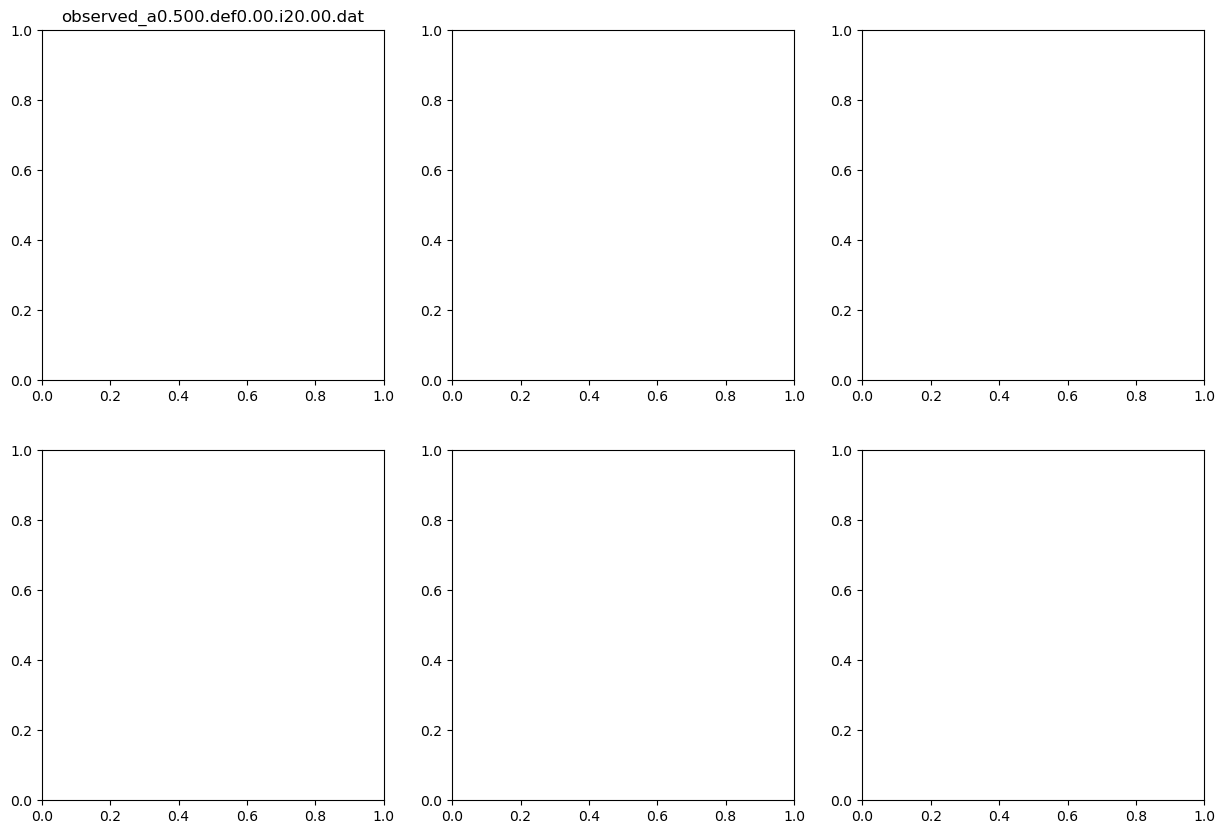

In [40]:
# Plot comparison
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, filename in enumerate(filenames):
    row = i // 3
    col = i % 3
    ax[row, col].set_title(filename)
    ax[row, col].add_subplot(1, 1, 1, projection='scatter_density')
    ax[row, col].scatter_density(x, y, cmap='magma', dpi=36)
    ax[row, col].set_xlim(-12, 12)
    ax[row, col].set_ylim(-12, 12)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
plt.tight_layout()
plt.show()